<a href="https://colab.research.google.com/github/Anpr1211/Meteorite-Landing-Visualisation/blob/master/Meteorite_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
  
!pip install pyproj==1.9.6

In [0]:
import pandas as pd

import plotly.plotly as py
from plotly.graph_objs import *

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [0]:
url = "https://raw.githubusercontent.com/Anpr1211/Meteorite-Landing-Visualisation/master/Meteorite.csv"

df = pd.read_csv(url, index_col="Unnamed: 0")

In [5]:
df.head(5)

,fall,id,mass,name,nametype,recclass,reclat,reclong,year
0,Fell,1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01T00:00:00.000
1,Fell,2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01T00:00:00.000
2,Fell,6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01T00:00:00.000
3,Fell,10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01T00:00:00.000
4,Fell,370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01T00:00:00.000


In [0]:
import numpy as np
plt.figure(figsize=(20, 10))
# miller projection
map = Basemap(projection='mill')
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='turquoise',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
#date = datetime.utcnow()
#CS=map.nightshade(date)
#plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()



In [0]:
lats = list(df['reclat'])
longs = list(df['reclong'])

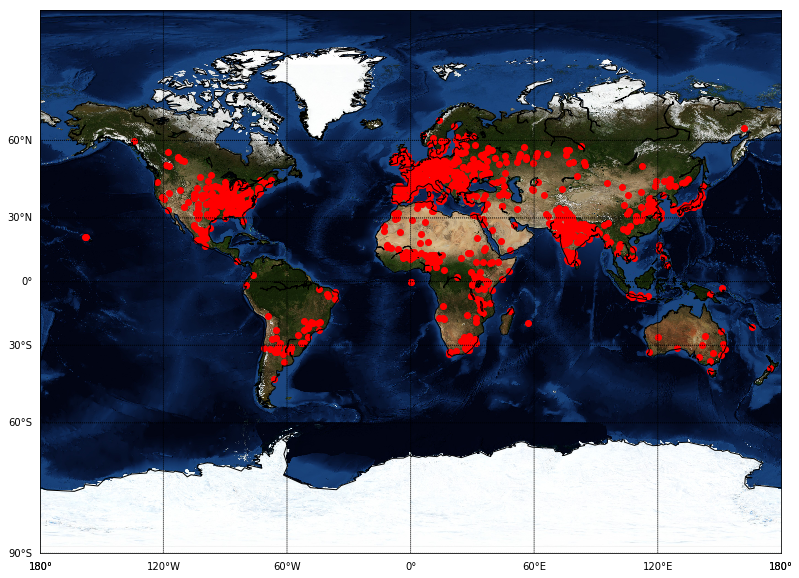

In [52]:
plt.figure(figsize=(30, 10))

map = Basemap(projection='mill')

x, y = map(longs, lats)

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

map.scatter(x, y, marker='o', color='red')
map.bluemarble()
plt.show()